# Python Article Libary

In [1]:
pip install newspaper3k


Note: you may need to restart the kernel to use updated packages.


In [2]:
from newspaper import Article


In [3]:
url = 'https://humanparts.medium.com/im-not-weird-you-re-weird-b88bc9ed6621'

In [4]:
article = Article(url)


Download article

In [5]:
article.download()


Find the publish date

In [6]:
article.publish_date


''

In [7]:
article.parse()


In [8]:
text = article.text

In [9]:
article.top_image

'https://miro.medium.com/focal/1200/632/50/37/1*7M8X6ZbcftelY-1BRRhc6Q.jpeg'

Take a look at the image

In [10]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://miro.medium.com/focal/1200/632/50/37/1*7M8X6ZbcftelY-1BRRhc6Q.jpeg")

In [11]:
article.authors

['Ginny Hogan']

In [12]:
article.nlp()


In [13]:
article.keywords


['drink',
 'wrong',
 'youre',
 'wasnt',
 'im',
 'know',
 'taking',
 'care',
 'drinking',
 'dont',
 'food',
 'weird',
 'hard',
 'didnt',
 'id']

In [14]:
article.summary


'I wasn’t wrong.\nI didn’t know what the inside of my stomach looked like.\nI don’t drink.\nI told the aforementioned nutritionist I didn’t know how to eat.\nI’d drink, and I’d feel good.'

# NLTK for Text Processing

In [15]:
pip install nltk


Note: you may need to restart the kernel to use updated packages.


In [16]:
import nltk


In [17]:
nltk.download()


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

Remove punctuation

In [18]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
text = tokenizer.tokenize(text)

text = ' '.join(word for word in text)


Tokenize words

In [19]:
from nltk.tokenize import word_tokenize
tokenized_word=word_tokenize(text)


Lowercase

In [20]:
tokenized_word = [word.lower() for word in tokenized_word]

Remove stopwords

In [21]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
print(stop_words)


{'why', 'will', "wasn't", 'what', 'we', 'won', 'on', 'from', 'has', 'weren', 'too', 'theirs', 'but', 'hasn', 'itself', "that'll", 'such', "hadn't", 'should', "you'd", 'if', 'very', 'few', 'hadn', 'himself', 'there', 'some', 'hers', 'my', "she's", 'into', 'the', 'themselves', 'above', 'isn', 'their', 'here', 'shan', 'up', 'me', "hasn't", 'own', 'once', 'by', 'y', 'she', 'that', 'all', 'herself', 'only', 'not', 'his', 're', 'myself', "it's", 'against', 'or', 'while', 'off', "wouldn't", "shouldn't", 'which', 'll', "haven't", "you've", 'have', "mightn't", 'you', 'whom', 'ourselves', 'i', 'as', "mustn't", 'were', "you're", "didn't", 'do', 'out', 'don', 'being', 'm', 'needn', 'had', 'between', 'most', 'during', 'both', 'ma', "won't", 'yourself', 'is', 'it', 'doing', 'more', 'about', "weren't", 'so', 'when', 'for', 'to', 'an', 'and', "doesn't", 'wasn', 'this', 'same', 'was', 'over', "aren't", 'until', 'a', 'how', 'be', 'through', 'each', 'does', 'these', 'then', 'did', 'them', 'who', "should'

In [22]:
filtered_word = []
for word in tokenized_word:
  if word not in stop_words:
    filtered_word.append(word)
    

Stemming the word

In [23]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()

stemmed_words = []
for w in filtered_word:
  stemmed_words.append(ps.stem(w))

#See how stemming works
for word in ['thinking', 'felt', 'asked','challenging','devoted']:
    print(ps.stem(word))


think
felt
ask
challeng
devot


Try with lemmatization and compare it with stemming

In [24]:
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()


In [25]:
lem_words = []
for w in filtered_word:
  lem_words.append(lem.lemmatize(w,'v'))
  

In [26]:
for word in ['thinking', 'felt', 'asked','challenging','devoted']:
    print(lem.lemmatize(word,'v'))


think
felt
ask
challenge
devote


In [27]:
from nltk.probability import FreqDist
fdist = FreqDist(lem_words)


In [28]:
most_common = fdist.most_common(20)
most_common


[('food', 24),
 ('drink', 22),
 ('think', 19),
 ('one', 15),
 ('know', 15),
 ('try', 14),
 ('get', 13),
 ('want', 12),
 ('wrong', 10),
 ('make', 10),
 ('like', 9),
 ('body', 9),
 ('eat', 8),
 ('go', 8),
 ('tell', 8),
 ('problem', 8),
 ('time', 8),
 ('life', 7),
 ('things', 7),
 ('find', 7)]

In [29]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [30]:
import matplotlib.pyplot as plt


Text(0, 0.5, 'Frequency')

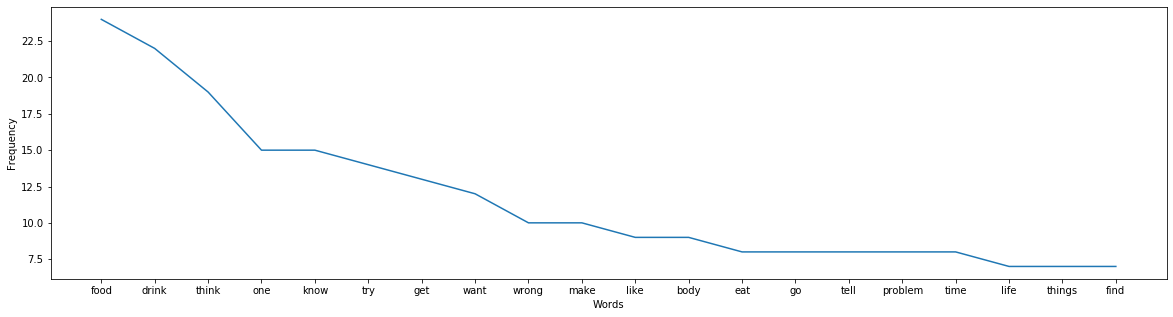

In [31]:
plt.figure(figsize=(20,5))
plt.plot([word[0] for word in most_common], [word[1] for word in most_common])
plt.xlabel('Words')
plt.ylabel('Frequency')